# Graph Topology - Node Type Degree

### Compute the counts - will be massive???

TODO average as stream if necessary

# Imports 

In [1]:
import sys
import os
from pathlib import Path
from collections import defaultdict
import networkx as nx
import numpy as np
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sys.path.append(str(Path(os.path.abspath("")).parent))

import config
from dataset import load_ids
from dataset import _process_problem
from config import NODE_TYPE

In [3]:
#ID_FILE = '../id_files/deepmath.txt'
ID_FILE = '../id_files/train.txt'

ids = load_ids(ID_FILE)

ids = ids[:5] # FIXME
print('Number of problems', len(ids))

Number of problems 5


In [4]:
res = defaultdict(list)

In [5]:
for i in ids:

    # Get the graph
    data = _process_problem(i, config.PROBLEM_DIR, remove_argument_node=False)

    G = nx.Graph()    
    sources = np.array(data.edge_index[0].detach())
    targets = np.array(data.edge_index[1].detach())
    G.add_edges_from(list(zip(sources, targets)))


    # Count the degree of every node
    for n in range(len(data.x)):

        degrees = G.degree()

        nodes = data.x.numpy()
        res[nodes[n]].append(degrees[n]) 

## Save the result

In [6]:
with open('graph_node_type_degree.pickle', 'wb') as handle:
    pickle.dump(data, handle, protocol=pickle.HIGHEST_PROTOCOL)

## Compute main stats

In [7]:
stats = {}
for k, v in res.items():
    tmp = {}
    
    tmp['Min'] = min(v)
    tmp['Max'] = max(v)
    tmp['Mean'] = np.mean(v)
    
    stats[NODE_TYPE[k]] = tmp

In [8]:
df = pd.DataFrame(stats).T
df

,Min,Max,Mean
Forall,3.0,6.0,3.089147
Variable,2.0,15.0,5.396667
Functor,1.0,94.0,7.205556
Argument,2.0,4.0,2.955479
Application,2.0,228.0,4.440843
Negation,2.0,2.0,2.000000
And,3.0,3.0,3.000000
Equality,3.0,4.0,3.011494
Or,3.0,3.0,3.000000
Conjecture,1.0,1.0,1.000000


In [9]:
## Plot degrees for each type

In [10]:
list(map(NODE_TYPE.get, sorted(res.keys())))

['Variable',
 'Functor',
 'Argument',
 'Application',
 'Equality',
 'Negation',
 'And',
 'Or',
 'Equivalent',
 'Forall',
 'Exists',
 'Axiom',
 'Conjecture']

In [11]:
sorted(res.keys())

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

2
3
4
5
6
7
8
9
10
11
12
13
14


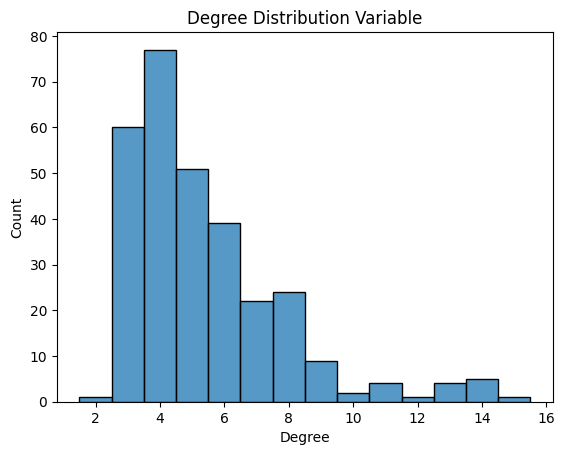

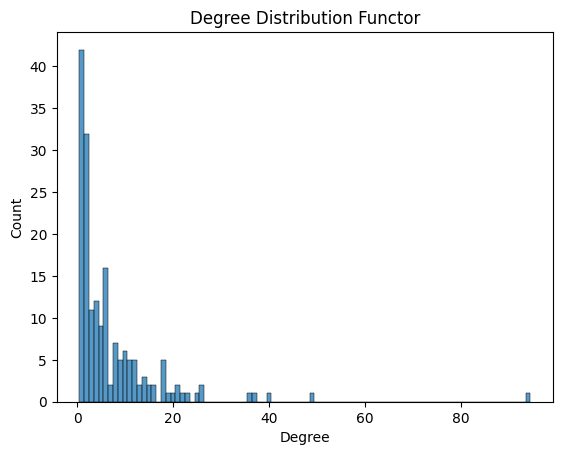

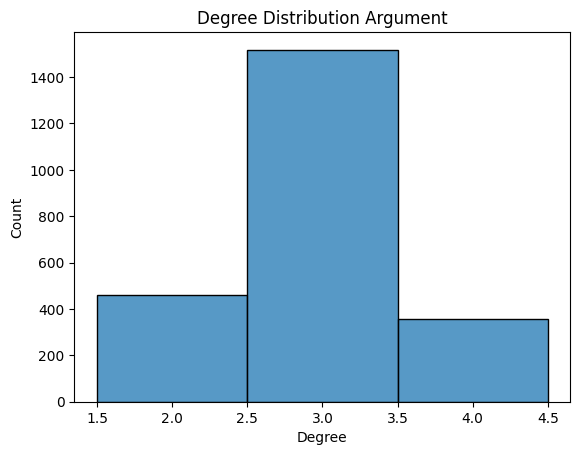

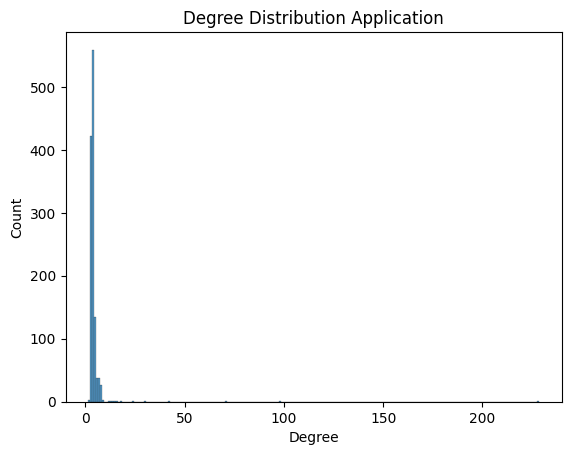

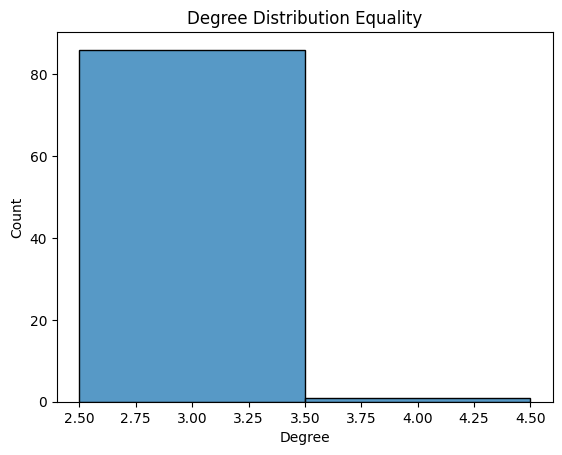

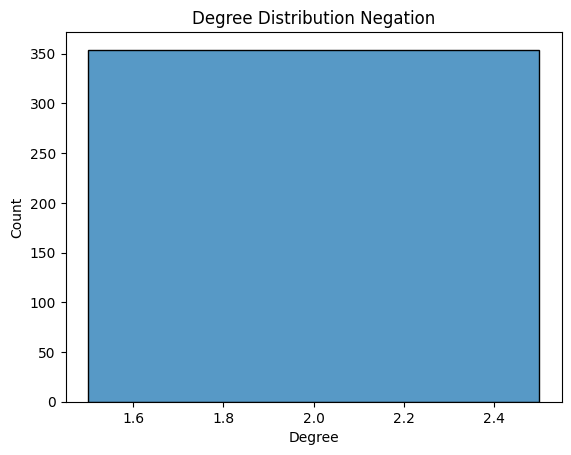

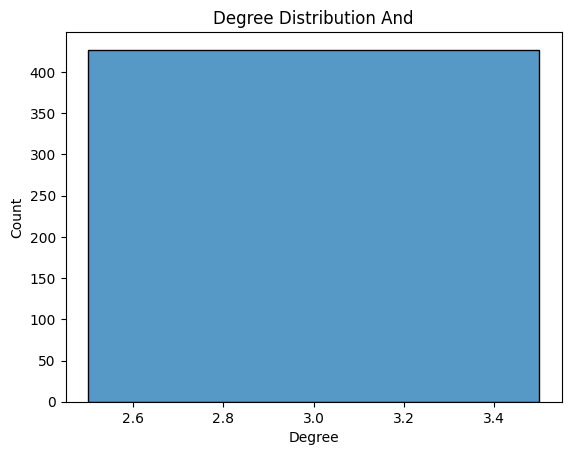

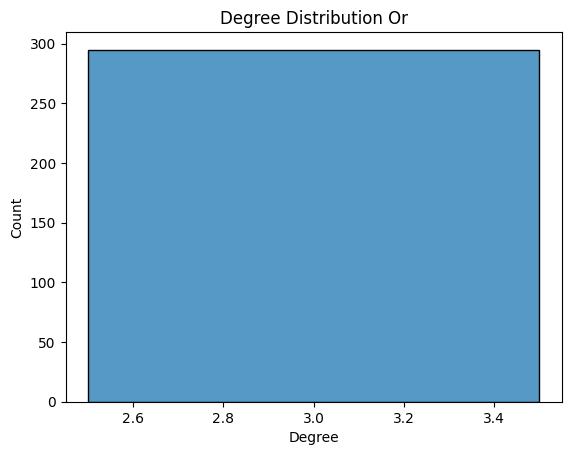

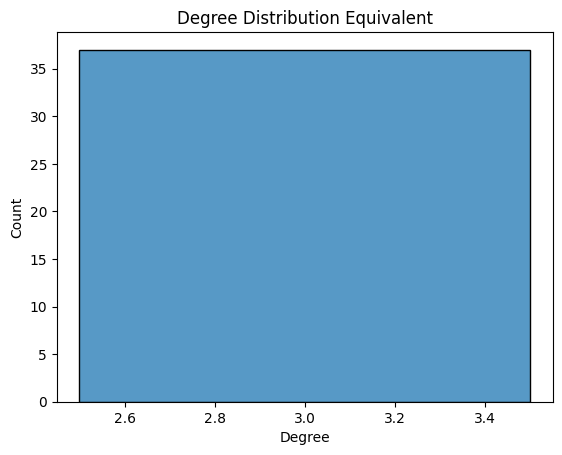

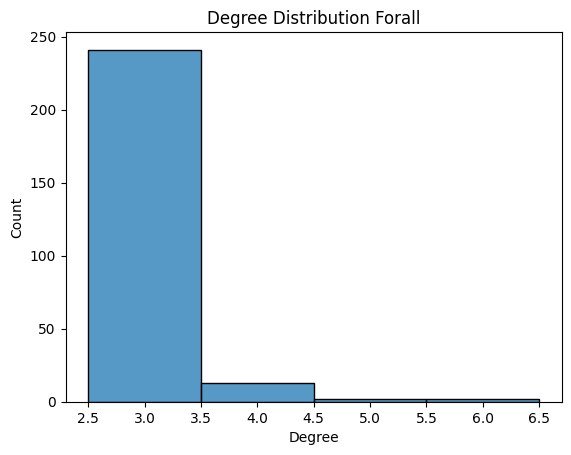

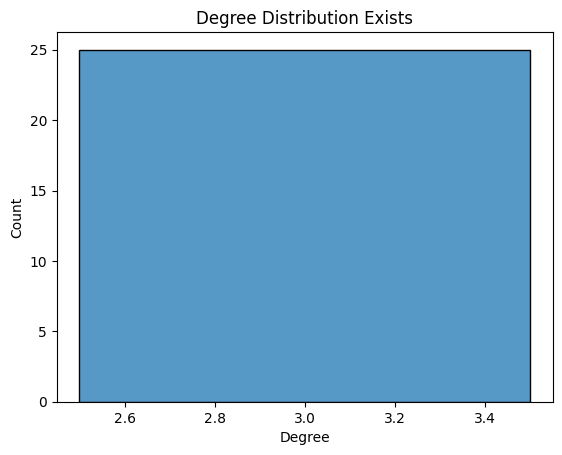

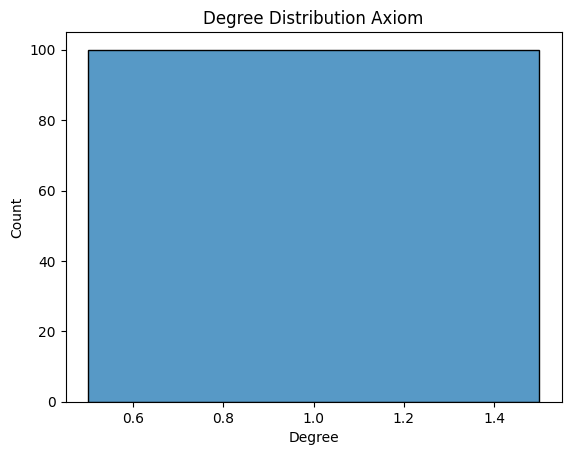

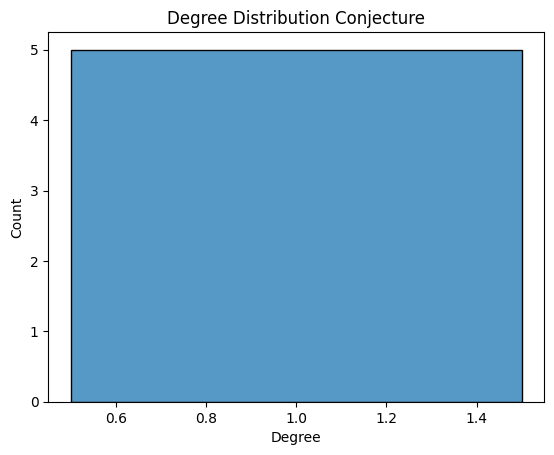

<Figure size 640x480 with 0 Axes>

In [12]:
for k in sorted(res.keys()):
    ax = sns.histplot(res[k], discrete=True)
    ax.set_xlabel('Degree')
    ax.set_title(f'Degree Distribution {NODE_TYPE[k]}')
    plt.figure()